In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Polska

In [2]:
URL = "https://pl.wikipedia.org/wiki/Pandemia_COVID-19_w_Polsce"

In [3]:
res = requests.get(URL).text
soup = BeautifulSoup(res, 'lxml')
tables = soup.find_all("table", class_="wikitable mw-collapsible mw-collapsed")
df = pd.read_html(tables[8].prettify())[0]

In [4]:
URL = "https://pl.wikipedia.org/wiki/Województwo"
res = requests.get(URL).text
soup = BeautifulSoup(res, 'lxml')
tables = soup.find_all("table", class_="wikitable sortable")
lud = pd.read_html(tables[0].prettify())[0]
lud = lud[['Województwo', 'Ludność  (30 VI 2020)  [4]']]

In [5]:
df.columns = df.columns.get_level_values(2)
date = df[:-9]
date.columns

Index(['Data', 'Narastająco', 'Łączny  dzienny przyrost', 'Przyrost w %',
       'dolnośląskie', 'kujawsko-pomorskie', 'lubelskie', 'lubuskie',
       'łódzkie', 'małopolskie', 'mazowieckie', 'opolskie', 'podkarpackie',
       'podlaskie', 'pomorskie', 'śląskie', 'świętokrzyskie',
       'warmińsko-mazurskie', 'wielkopolskie', 'zachodniopomorskie', 'Źródło'],
      dtype='object')

In [6]:
date

,Data,Narastająco,Łączny dzienny przyrost,Przyrost w %,dolnośląskie,kujawsko-pomorskie,lubelskie,lubuskie,łódzkie,małopolskie,...,opolskie,podkarpackie,podlaskie,pomorskie,śląskie,świętokrzyskie,warmińsko-mazurskie,wielkopolskie,zachodniopomorskie,Źródło
0,04.03,1,1,–,–,–,–,1,–,–,...,–,–,–,–,–,–,–,–,–,[367]
1,05.03,1,–,0,–,–,–,–,–,–,...,–,–,–,–,–,–,–,–,–,[368]
2,06.03,5,4,400,1,–,–,–,–,–,...,–,–,–,–,–,–,1,–,2,[26]
3,07.03,6,1,200,–,–,–,–,–,–,...,–,–,–,–,–,–,1,–,–,[369]
4,08.03,11,5,833,1,–,–,–,–,–,...,–,–,–,–,2,–,–,–,–,[74]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,24.11,909 066,10 139,116,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[11]
266,25.11,924 428,15 362,169,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[11]
267,26.11,941 112,16 687,181,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[11]
268,27.11,958 416,17 060,181,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[11]


In [7]:
voivodeship = ['Data', 'dolnośląskie', 'kujawsko-pomorskie', 'lubelskie', 'lubuskie',
       'łódzkie', 'małopolskie', 'mazowieckie', 'opolskie', 'podkarpackie',
       'podlaskie', 'pomorskie', 'śląskie', 'świętokrzyskie',
       'warmińsko-mazurskie', 'wielkopolskie', 'zachodniopomorskie']

In [8]:
date = date[voivodeship]
date = date[:-9]

In [9]:
def fill(row):
    new_row = []
    for it in row:
        if(it == '–'):
            new_row.append(0)
        else:
            new_row.append(it)
    return new_row

In [10]:
date = date.apply(lambda x: fill(x))
date.columns.get_level_values(0)

Index(['Data', 'dolnośląskie', 'kujawsko-pomorskie', 'lubelskie', 'lubuskie',
       'łódzkie', 'małopolskie', 'mazowieckie', 'opolskie', 'podkarpackie',
       'podlaskie', 'pomorskie', 'śląskie', 'świętokrzyskie',
       'warmińsko-mazurskie', 'wielkopolskie', 'zachodniopomorskie'],
      dtype='object')

In [11]:
for x in date.columns:
    if x != 'Data':
        date[x] = date[x].map(lambda x: str(x).replace(u'\xa0', '').replace(' ', ''))
        date[x] = date[x].map(lambda x: int(x))

In [12]:
date['Data'] = date['Data'].map(lambda x: pd.to_datetime('2020.'+x.split('.')[1]+'.'+x.split('.')[0]))

In [13]:
for x in date.columns:
    if x != 'Data':
        date[x] = date[x].map(lambda x: abs(x))

In [14]:
pd.set_option('display.max_rows', 100)

In [15]:
date['Dzień_tygodnia'] = date['Data'].dt.dayofweek

In [16]:
date = date.set_index('Data')

In [17]:
date.columns

Index(['dolnośląskie', 'kujawsko-pomorskie', 'lubelskie', 'lubuskie',
       'łódzkie', 'małopolskie', 'mazowieckie', 'opolskie', 'podkarpackie',
       'podlaskie', 'pomorskie', 'śląskie', 'świętokrzyskie',
       'warmińsko-mazurskie', 'wielkopolskie', 'zachodniopomorskie',
       'Dzień_tygodnia'],
      dtype='object')

In [18]:
def sum(x):
    suma = 0
    for idx, it in enumerate(x):
        if idx != 16:
            suma = suma + it
    return suma

In [19]:
date['Polska'] = date.apply(lambda x: sum(x), axis=1)

In [20]:
df = pd.read_csv('death.csv', index_col='Data')
del df['Unnamed: 0']

In [21]:
date['Zgony'] = df['Zgony'].values

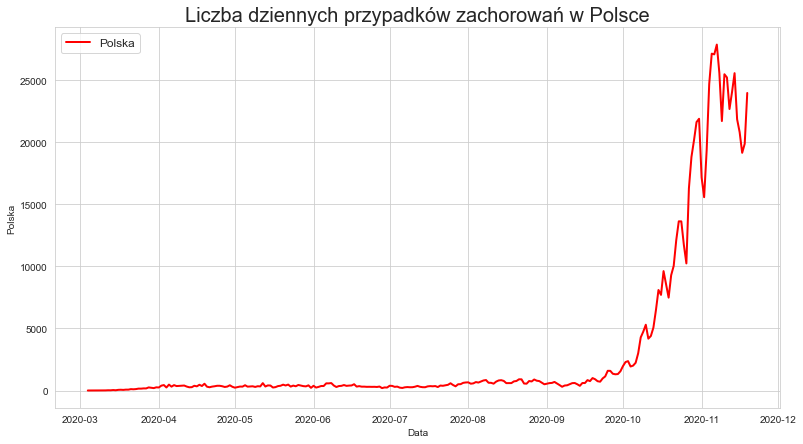

In [22]:
plt.figure(figsize=(13,7))
sns.set_style("whitegrid")
sns.lineplot(data = date['Polska'], linewidth=2, color='red', label="Polska");
plt.legend(fontsize='large')  
plt.title("Liczba dziennych przypadków zachorowań w Polsce", size=20)
plt.show()

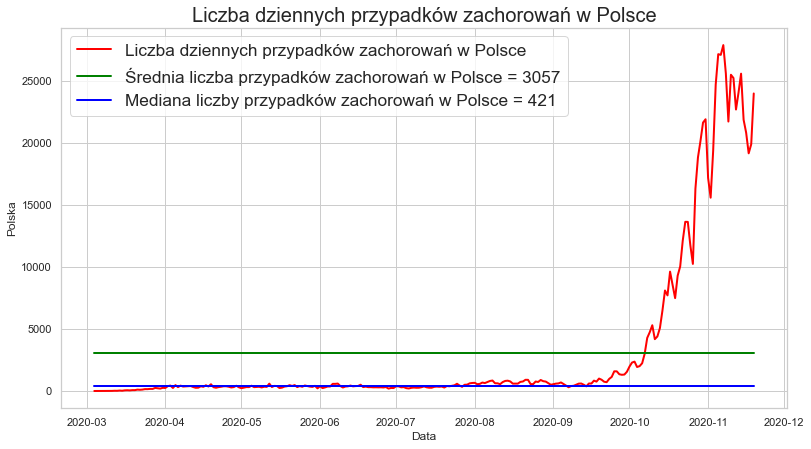

In [101]:
plt.figure(figsize=(13,7))
sns.set_style("whitegrid")
sns.lineplot(data = date['Polska'], color='red', linewidth=2, label="Liczba dziennych przypadków zachorowań w Polsce");
plt.plot([date.index.min(),date.index.max()],[date['Polska'].mean(),date['Polska'].mean()], color = 'green', linewidth=2, label='Średnia liczba przypadków zachorowań w Polsce = {}'.format(3057))
plt.plot([date.index.min(),date.index.max()],[date['Polska'].median(),date['Polska'].median()], color = 'blue', linewidth=2, label='Mediana liczby przypadków zachorowań w Polsce = {}'.format(421))

plt.legend(fontsize='x-large')  
plt.title("Liczba dziennych przypadków zachorowań w Polsce", size=20)
plt.show()

In [37]:
date.columns

Index(['dolnośląskie', 'kujawsko-pomorskie', 'lubelskie', 'lubuskie',
       'łódzkie', 'małopolskie', 'mazowieckie', 'opolskie', 'podkarpackie',
       'podlaskie', 'pomorskie', 'śląskie', 'świętokrzyskie',
       'warmińsko-mazurskie', 'wielkopolskie', 'zachodniopomorskie',
       'Dzień_tygodnia', 'Polska', 'Zgony'],
      dtype='object')

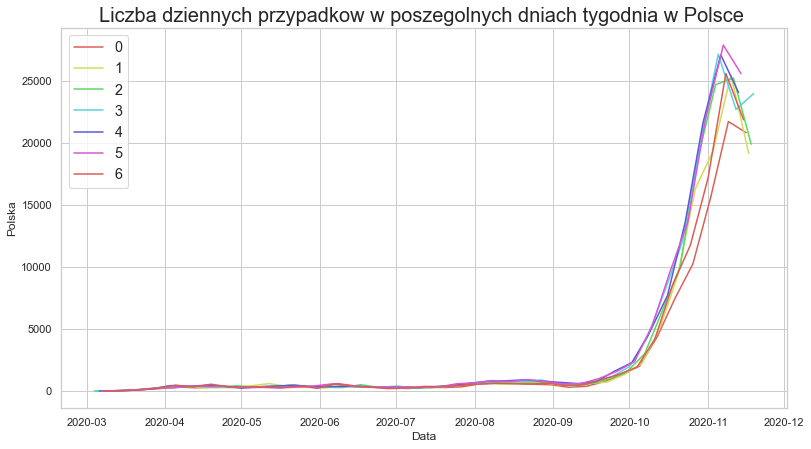

In [74]:
plt.figure(figsize=(13,7))
sns.set_style("whitegrid")
sns.lineplot(data=date,x=date.index,y=date['Polska'],hue='Dzień_tygodnia', color=['r'], palette= "hls")


plt.legend(fontsize='large')  
plt.title("Liczba dziennych przypadkow w poszegolnych dniach tygodnia w Polsce ", size=20)
plt.show()

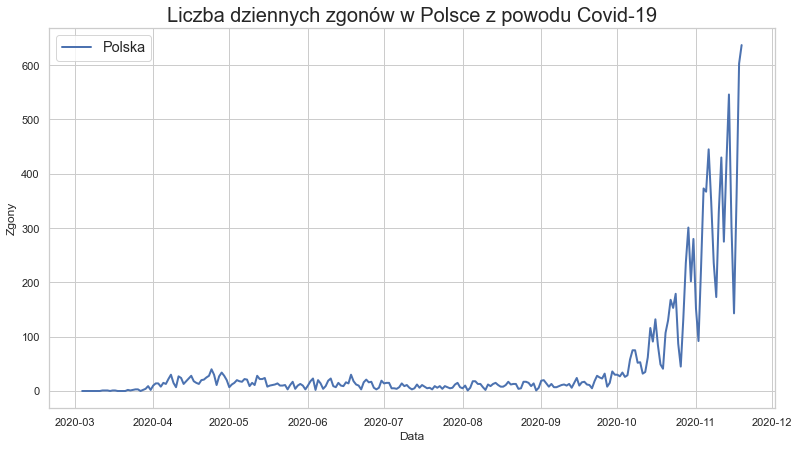

In [102]:
plt.figure(figsize=(13,7))
sns.set_style("whitegrid")
sns.lineplot(data=date, x=date.index, y=date['Zgony'],linewidth=2, label='Polska')

plt.legend(fontsize='large')  
plt.title("Liczba dziennych zgonów w Polsce z powodu Covid-19", size=20)
plt.show()

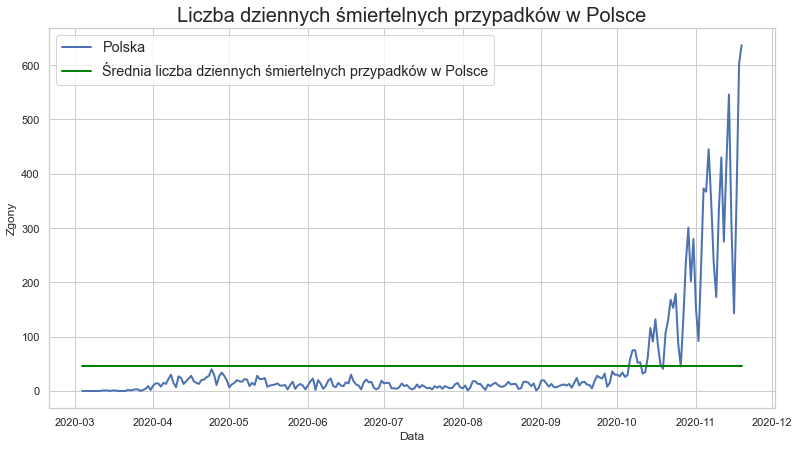

In [103]:
plt.figure(figsize=(13,7))
sns.set_style("whitegrid")
sns.lineplot(data=date, x=date.index, y=date['Zgony'],linewidth=2, label='Polska')
plt.plot([date.index.min(),date.index.max()],[date['Zgony'].mean(),date['Zgony'].mean()], color = 'green', linewidth=2, label='Średnia liczba dziennych śmiertelnych przypadków w Polsce')

plt.legend(fontsize='large')  
plt.title("Liczba dziennych śmiertelnych przypadków w Polsce", size=20)
plt.show()

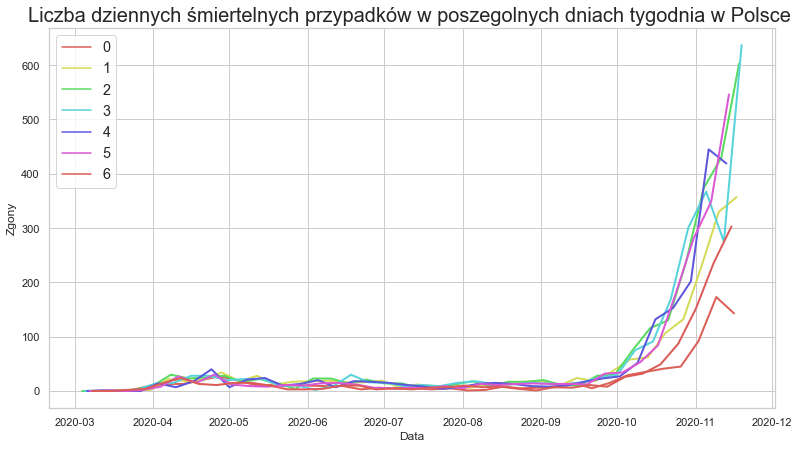

In [75]:
plt.figure(figsize=(13,7))
sns.set_style("whitegrid")
sns.lineplot(data=date,x=date.index,y=date['Zgony'],hue='Dzień_tygodnia', linewidth=2, palette= "hls")


plt.legend(fontsize='large')  
plt.title("Liczba dziennych śmiertelnych przypadków w poszegolnych dniach tygodnia w Polsce ", size=20)
plt.show()

In [136]:
lud['Ludność  (30 VI 2020)  [4]'] = lud['Ludność  (30 VI 2020)  [4]'].map(lambda x: str(x).replace(u'\xa0', '').replace(' ', ''))
lud['Ludność  (30 VI 2020)  [4]'] = lud['Ludność  (30 VI 2020)  [4]'].map(lambda x: int(x))

tablica = []
for idx, it in enumerate(lud['Województwo']):
    tablica.append((it, (date[it].sum()/lud['Ludność  (30 VI 2020)  [4]'].iloc[idx])*10000))

df1 = pd.DataFrame(tablica, columns=['Województwo', 'Średnia liczba przypadkow zakażeń na 10 000 mieszkańców'])

In [142]:
suma = []
for idx, it in enumerate(df1['Województwo']):
    suma.append(date[it].sum())
df1['Suma zakażeń'] = suma
suma = []
for idx, it in enumerate(df1['Województwo']):
    suma.append(lud['Ludność  (30 VI 2020)  [4]'].iloc[idx])
df1['Liczba mieszkańców'] = suma
df1

,Województwo,Średnia liczba przypadkow zakażeń na 10 000 mieszkańców,Suma zakażeń,Liczba mieszkańców
0,dolnośląskie,199.439370,57808,2898525
1,kujawsko-pomorskie,217.747972,45058,2069273
2,lubelskie,194.519008,40914,2103342
3,lubuskie,167.406306,16911,1010177
4,łódzkie,225.224434,55151,2448713
5,małopolskie,247.031941,84335,3413931
6,mazowieckie,178.714897,97007,5428031
7,opolskie,239.311725,23471,980771
8,podkarpackie,209.351235,44506,2125901
9,podlaskie,176.877652,20811,1176576


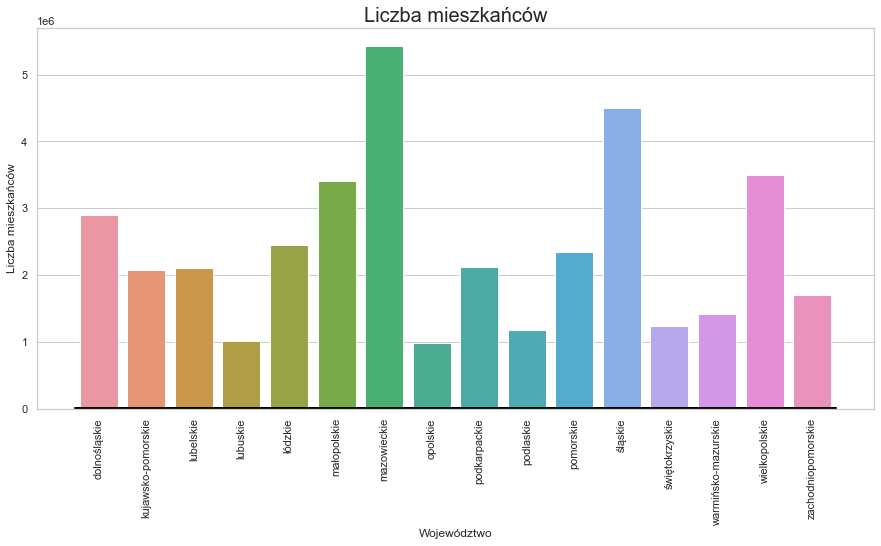

In [143]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.set_style("whitegrid")
sns.barplot(data = df1, x='Województwo', y='Liczba mieszkańców');
plt.plot([-0.5, 15.5],[176.877652, 176.877652], linewidth=2, color='black')

plt.title("Liczba mieszkańców", size=20)
plt.show()

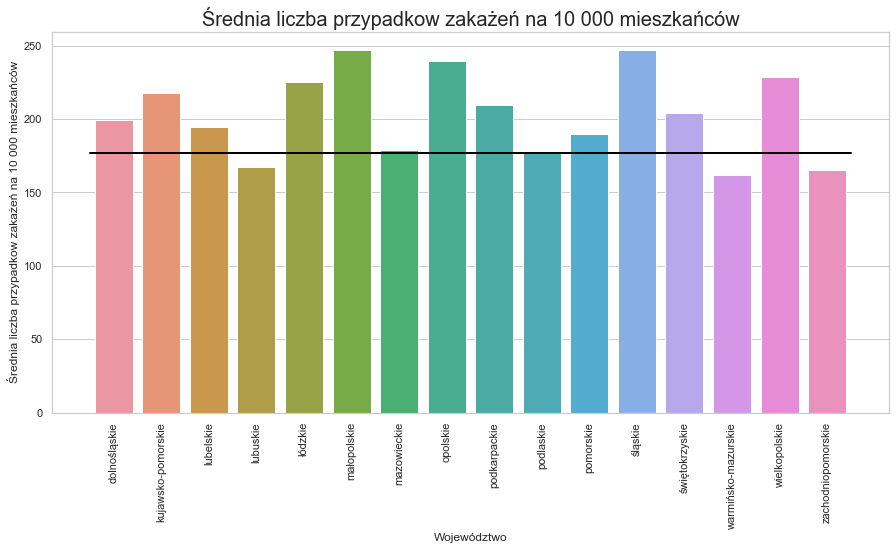

In [140]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.set_style("whitegrid")
sns.barplot(data = df1, x='Województwo', y='Średnia liczba przypadkow zakażeń na 10 000 mieszkańców');
plt.plot([-0.5, 15.5],[176.877652, 176.877652], linewidth=2, color='black')

plt.title("Średnia liczba przypadkow zakażeń na 10 000 mieszkańców", size=20)
plt.show()

In [79]:
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")

plt.show();

<Figure size 1080x504 with 0 Axes>

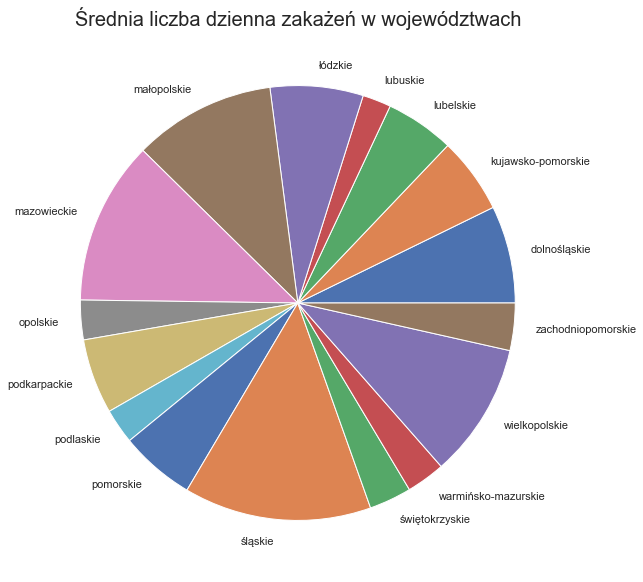

In [141]:
plt.figure(figsize=(13,10))
plt.xticks(rotation=90)
plt.pie(date[voivodeship[1:]].mean(), labels=date[voivodeship[1:]].columns, radius=1.0)
plt.title('Średnia liczba dzienna zakażeń w województwach', size=20)
plt.show()

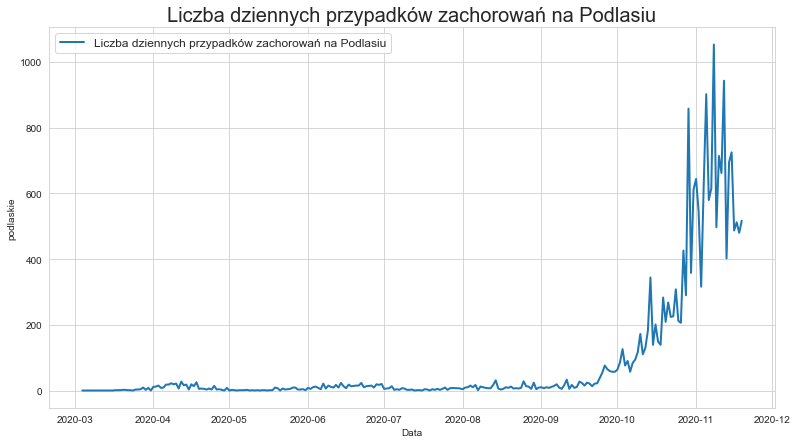

In [31]:
plt.figure(figsize=(13,7))
sns.set_style("whitegrid")
sns.lineplot(data = date['podlaskie'], linewidth=2, label="Liczba dziennych przypadków zachorowań na Podlasiu");

plt.legend(fontsize='large')  
plt.title("Liczba dziennych przypadków zachorowań na Podlasiu", size=20)
plt.show()

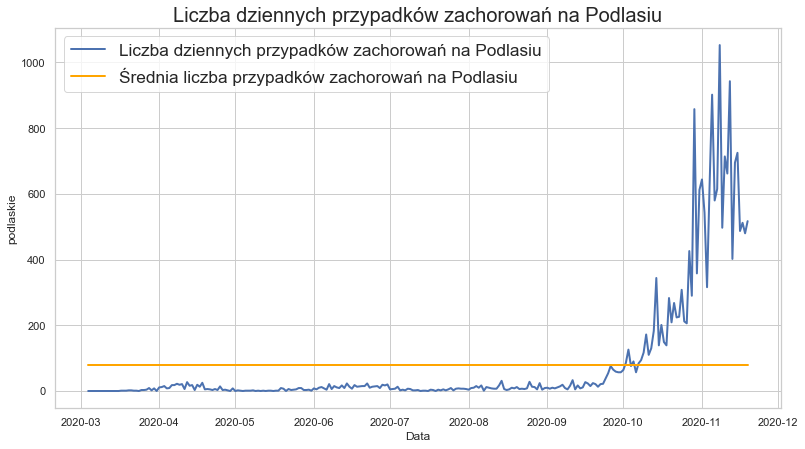

In [105]:
plt.figure(figsize=(13,7))
sns.set_style("whitegrid")

sns.lineplot(data = date['podlaskie'], linewidth=2, label="Liczba dziennych przypadków zachorowań na Podlasiu")
plt.plot([date.index.min(),date.index.max()],[date['podlaskie'].mean(),date['podlaskie'].mean()], color = 'orange', linewidth=2, label='Średnia liczba przypadków zachorowań na Podlasiu')
# plt.plot([date.index.min(),date.index.max()],[date['podlaskie'].median(),date['podlaskie'].median()], color = 'green', linewidth=2, label='Mediana liczby przypadków zachorowań na Podlasiu')


plt.legend(fontsize='x-large')  
plt.title("Liczba dziennych przypadków zachorowań na Podlasiu", size=20)
plt.show()

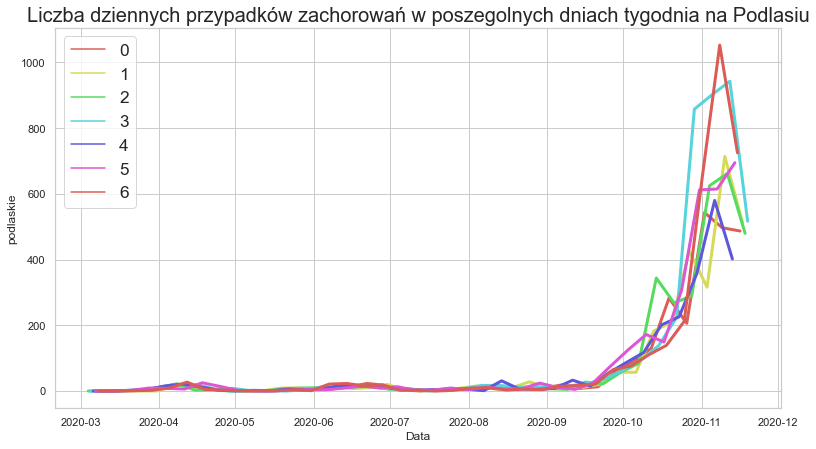

In [72]:
plt.figure(figsize=(13,7))
sns.set_style("whitegrid")
sns.lineplot(data = date, x=date.index, y=date['podlaskie'], hue='Dzień_tygodnia', linewidth=3, palette= "hls")

plt.legend(fontsize='x-large', )  
plt.title("Liczba dziennych przypadków zachorowań w poszegolnych dniach tygodnia na Podlasiu", size=20)
plt.show()

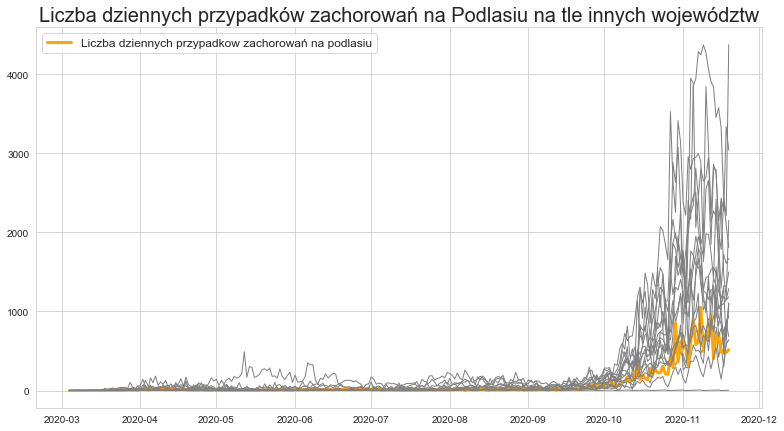

In [33]:
plt.figure(figsize=(13,7))
sns.set_style("whitegrid")


for column in date.columns:
    if column == 'podlaskie':
        plt.plot(date[column], color='orange', linewidth=3, label = 'Liczba dziennych przypadkow zachorowań na podlasiu');
    elif column == 'Polska':
        pass
#         plt.plot(date[column], color='red', linewidth=1, label = 'Polska');
    else:
        plt.plot(date[column], color='gray',linewidth=1);

        
plt.legend(fontsize='large')  
plt.title("Liczba dziennych przypadków zachorowań na Podlasiu na tle innych województw", size=20)
plt.show()

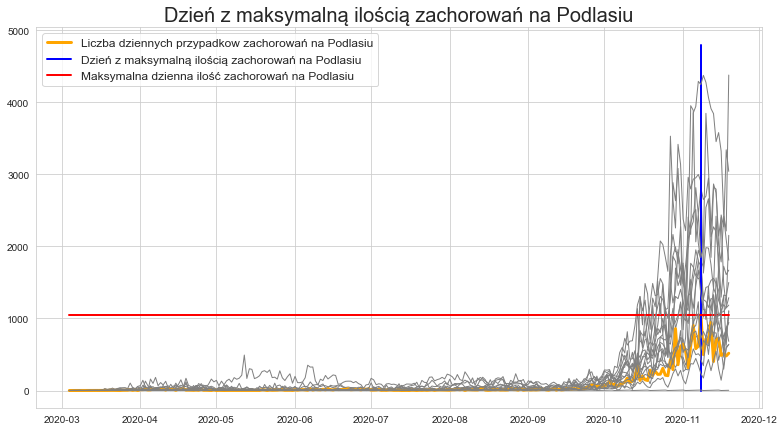

In [34]:
plt.figure(figsize=(13,7))
# plt.xticks(rotation=90)
sns.set_style("whitegrid")

for column in date.columns:
    
    if column == 'podlaskie':
        plt.plot(date[column], color='orange', linewidth=3, label = 'Liczba dziennych przypadkow zachorowań na Podlasiu');
        plt.plot([date[column].idxmax(),date[column].idxmax()],[0,4800], color = 'b', linewidth=2, label='Dzień z maksymalną ilością zachorowań na Podlasiu')
        plt.plot([date.index.min(),date.index.max()],[date[column].max(),date[column].max()], color = 'red', linewidth=2, label='Maksymalna dzienna ilość zachorowań na Podlasiu')
    elif column == 'Polska':
        pass
#         plt.plot(date[column], color='red', linewidth=1, label = 'Polska');
#         plt.plot([date[column].idxmax(),date[column].idxmax()],[0,Polska_max], color = 'r', linewidth=1)
    else:
#         plt.plot([date[column].idxmax(),date[column].idxmax()],[0,Polska_max], color = 'gray', linewidth=1)
        plt.plot(date[column], color='gray',linewidth=1);

        
# plt.plot([Polska_max_idx,Polska_max_idx],[0,Polska_max], color = 'g')
# plt.plot([podlaskie_max_idx,podlaskie_max_idx],[0,Polska_max], color = 'blue')
        

plt.legend(fontsize='large')        
plt.title("Dzień z maksymalną ilością zachorowań na Podlasiu", size=20)
plt.show()

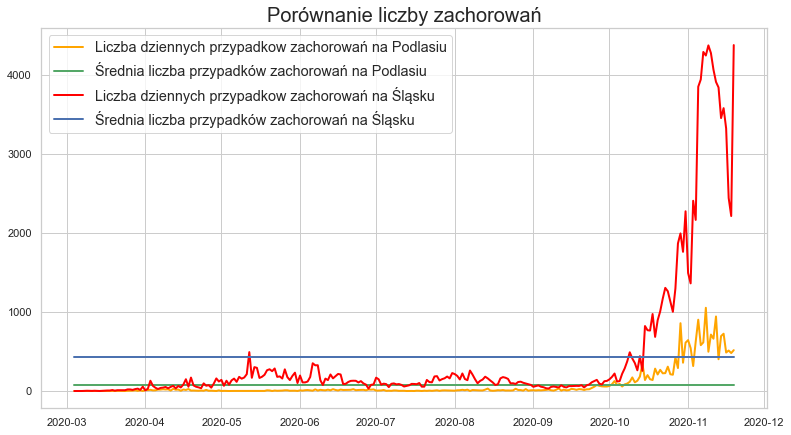

In [108]:
plt.figure(figsize=(13,7))
sns.set_style("whitegrid")

Polska_max = date[voivodeship[1:]].max().idxmax()

for column in date.columns:
    
    if column == 'podlaskie':
        plt.plot(date[column], color='orange', linewidth=2, label = 'Liczba dziennych przypadkow zachorowań na Podlasiu');
        plt.plot([date.index.min(),date.index.max()],[date[column].mean(),date[column].mean()], color = 'g', linewidth=2, label='Średnia liczba przypadków zachorowań na Podlasiu')
    elif column == Polska_max:
        pass
        plt.plot(date[column], color='red', linewidth=2, label = 'Liczba dziennych przypadkow zachorowań na Śląsku');
        plt.plot([date.index.min(),date.index.max()],[date[column].mean(),date[column].mean()], color = 'b', linewidth=2, label='Średnia liczba przypadków zachorowań na Śląsku')

    else:
        pass
#         plt.plot([date[column].idxmax(),date[column].idxmax()],[0,Polska_max], color = 'gray', linewidth=1)
#         plt.plot(date[column], color='gray',linewidth=1);

        
# plt.plot([Polska_max_idx,Polska_max_idx],[0,Polska_max], color = 'g')
# plt.plot([podlaskie_max_idx,podlaskie_max_idx],[0,Polska_max], color = 'blue')
        

plt.legend(fontsize='large')       
plt.title("Porównanie liczby zachorowań", size=20)
plt.show()

# Dane

https://pl.wikipedia.org/wiki/Pandemia_COVID-19_w_Polsce

https://pl.wikipedia.org/wiki/Województwo